In [1]:
import capabilities

spec = capabilities.LatticeSpecification('table_b.csv')

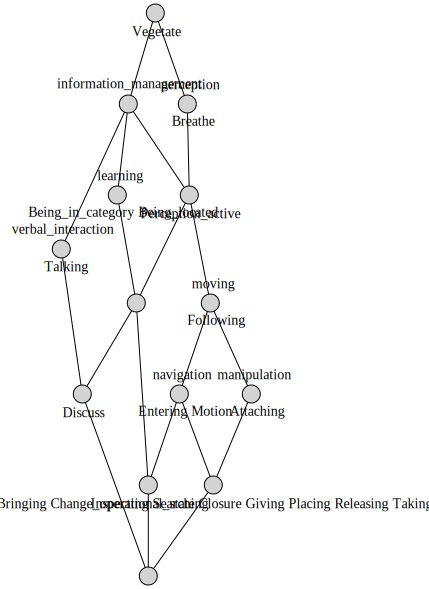

In [2]:
# visualize the Frame-capability lattice
spec.visualize()
# Going down means adding a required capability.
# Objects placed higher require less things, are more simple
# In order to find neighbors that only require a specified set of things (some capabilities are not available),
# the navigation should go up, considering all the objects in the path to the root
# that don't belong to the subtree with the missing capability.

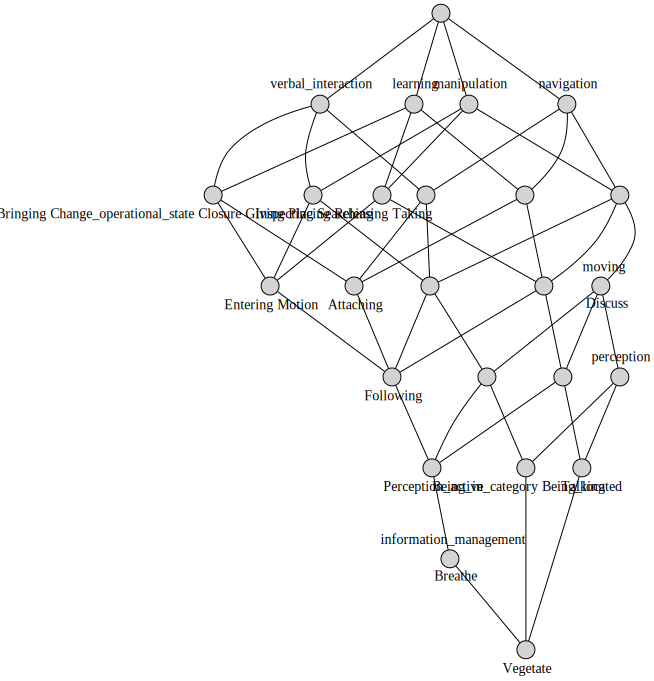

In [3]:
# visualize the Frame-incapability lattice
spec.visualize(inverse=True)
# going down means to remove requirements of capabilities.
# On the top there are the most complex actions.
# From a Frame request, it is possible to find the feasible Frames
# by meeting with the Concept identified by the capabilities that were required and are not available

In [4]:
recommender = spec.get_frame_recommender(['information_management', 'navigation', 'moving', 'perception', 'learning'])

In [5]:
recommender.can_fulfil('Bringing', verbose=True)
recommender.get_recommendation('Bringing', verbose=True)

requested: Bringing
	things required that cannot be provided:  ['manipulation']
nearest ('Entering', 'Motion') between ('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')


In [6]:
recommender.visualize_table()

frame,fulfillable,missing_cap,recommended,possible
Attaching,False,['manipulation'],"('Following',)","('Following', 'Perception_active', 'Breathe', 'Vegetate')"
Being_in_category,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located', 'Vegetate')"
Being_located,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located', 'Vegetate')"
Bringing,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Change_operational_state,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Closure,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Entering,True,[],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Following,True,[],"('Following',)","('Following', 'Perception_active', 'Breathe', 'Vegetate')"
Giving,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Inspecting,True,[],"('Inspecting', 'Searching')","('Being_in_category', 'Being_located', 'Entering', 'Following', 'Inspecting', 'Motion', 'Perception_active', 'Searching', 'Breathe', 'Vegetate')"


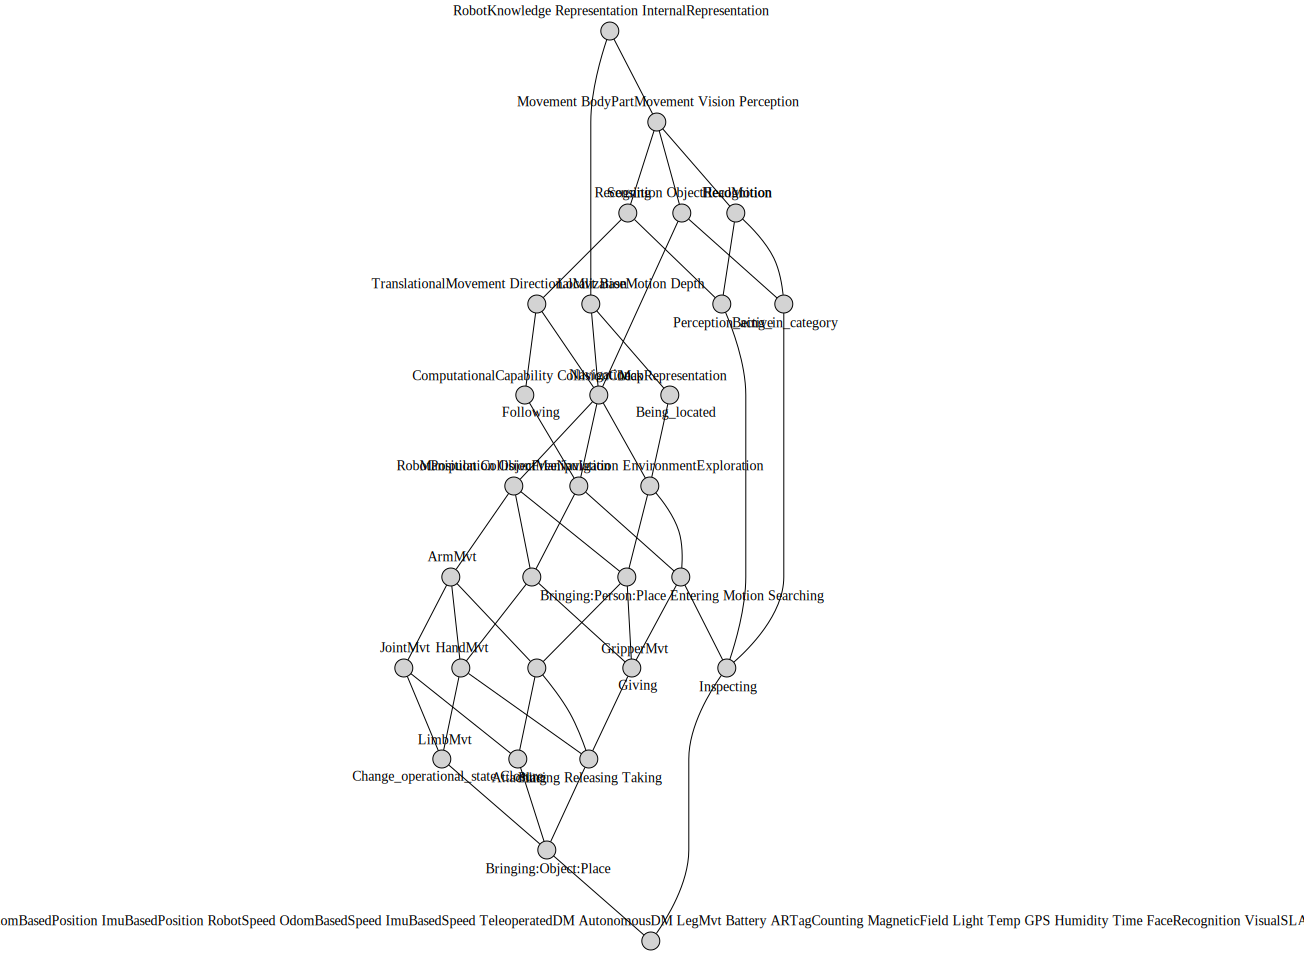

In [7]:
spec2 = capabilities.LatticeSpecification('CapabilitiesTaxonomy2.0.csv')
spec2.visualize()

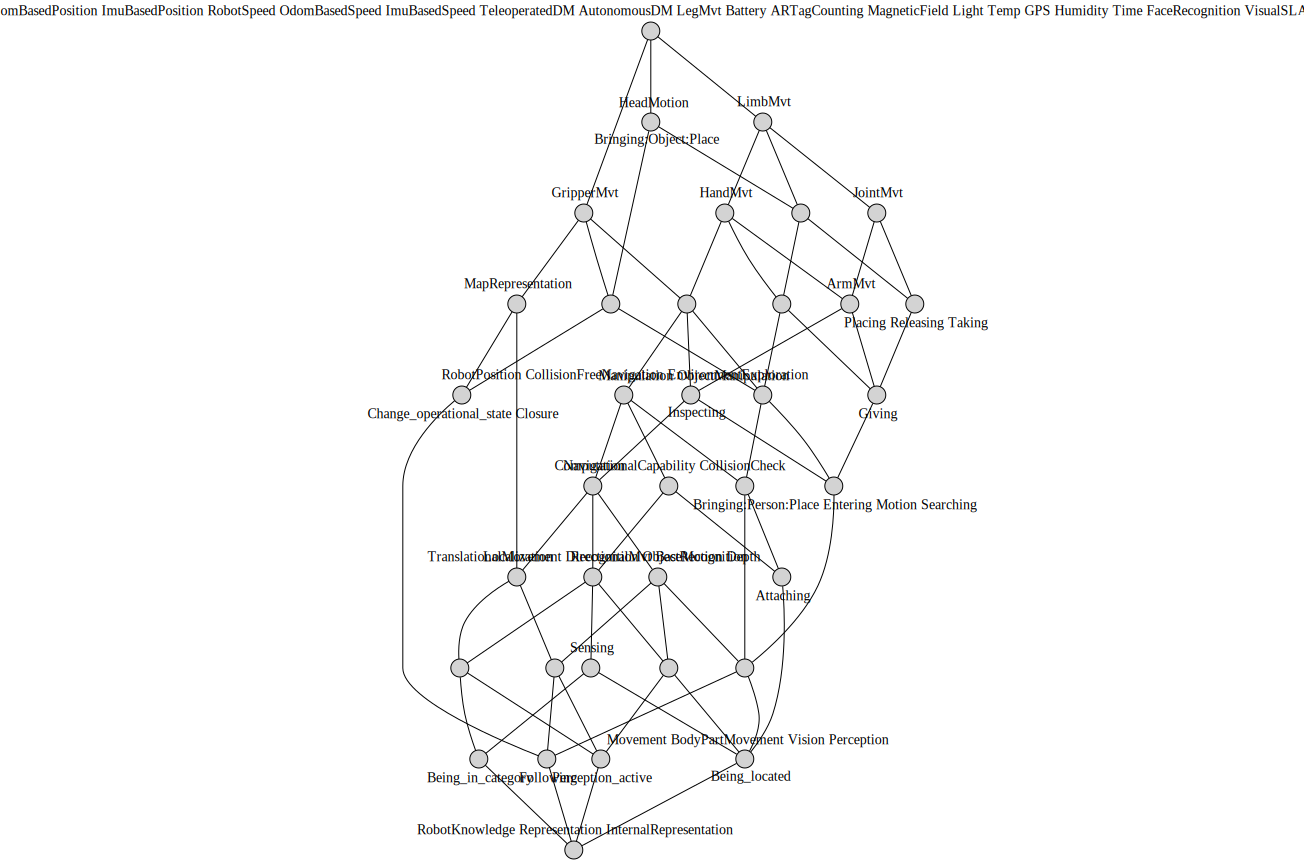

In [8]:
spec2.visualize(inverse=True)

In [9]:
recommender2 = spec2.get_frame_recommender(['RobotKnowledge',
                                           'Representation',
                                           'InternalRepresentation',
                                           'MapRepresentation',
                                           'Localization',
                                           'RobotPosition',
                                           'ComputationalCapability',
                                           'CollisionCheck',
                                           'Movement',
                                           'TranslationalMovement',
                                           'Navigation',
                                           'CollisionFreeNavigation',
                                           'EnvironmentExploration',
                                           'DirectionalMvt',
                                           'BodyPartMovement',
                                           'BaseMotion',
                                           'HeadMotion',
                                           'Sensing',
                                           'Vision',
                                           'Depth',
                                           'Perception',
                                           'Recognition',
                                           'ObjectRecognition'
                                          ])
recommender2.visualize_table()

frame,fulfillable,missing_cap,recommended,possible
Attaching,False,"['JointMvt', 'ArmMvt', 'Manipulation', 'ObjectManipulation']","('Being_located',)","('Being_located',)"
Being_in_category,True,[],"('Being_in_category',)","('Being_in_category',)"
Being_located,True,[],"('Being_located',)","('Being_located',)"
Bringing:Person:Place,True,[],"('Bringing:Person:Place', 'Entering', 'Motion', 'Searching')","('Being_located', 'Bringing:Person:Place', 'Entering', 'Following', 'Motion', 'Searching')"
Bringing:Object:Place,False,"['JointMvt', 'LimbMvt', 'HandMvt', 'GripperMvt', 'ArmMvt', 'Manipulation', 'ObjectManipulation']","('Bringing:Person:Place', 'Entering', 'Motion', 'Searching')","('Being_located', 'Bringing:Person:Place', 'Entering', 'Following', 'Motion', 'Searching')"
Change_operational_state,False,"['JointMvt', 'LimbMvt', 'HandMvt', 'ArmMvt', 'Manipulation', 'ObjectManipulation']","('Following',)","('Following',)"
Closure,False,"['JointMvt', 'LimbMvt', 'HandMvt', 'ArmMvt', 'Manipulation', 'ObjectManipulation']","('Following',)","('Following',)"
Entering,True,[],"('Bringing:Person:Place', 'Entering', 'Motion', 'Searching')","('Being_located', 'Bringing:Person:Place', 'Entering', 'Following', 'Motion', 'Searching')"
Following,True,[],"('Following',)","('Following',)"
Giving,False,"['GripperMvt', 'Manipulation', 'ObjectManipulation']","('Bringing:Person:Place', 'Entering', 'Motion', 'Searching')","('Being_located', 'Bringing:Person:Place', 'Entering', 'Following', 'Motion', 'Searching')"


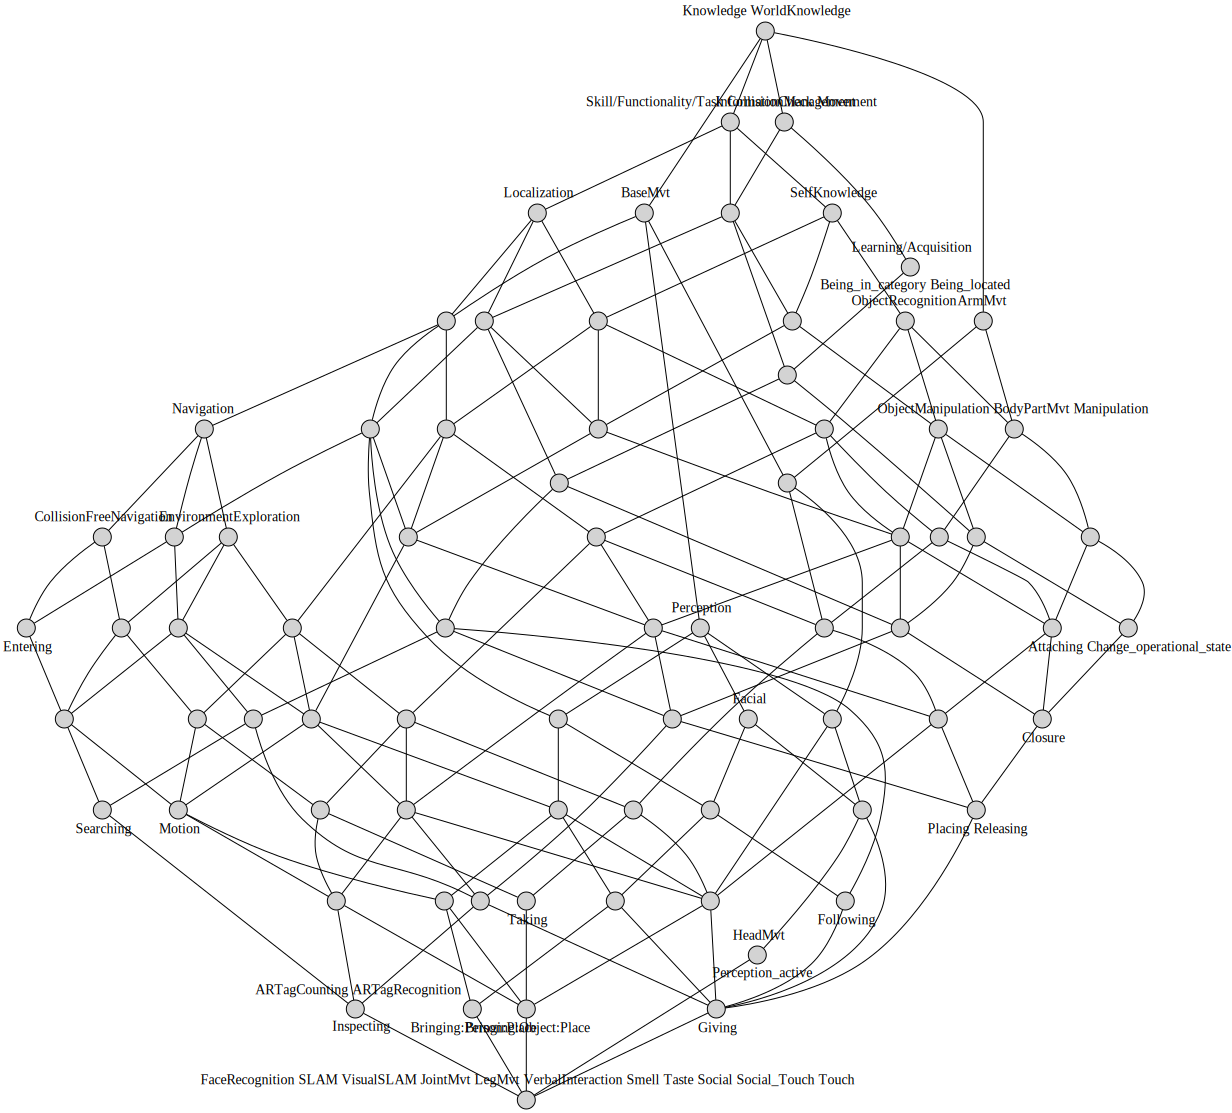

In [10]:
spec3 = capabilities.LatticeSpecification('CapabilitiesTaxonomy2.1.csv')
spec3.visualize()

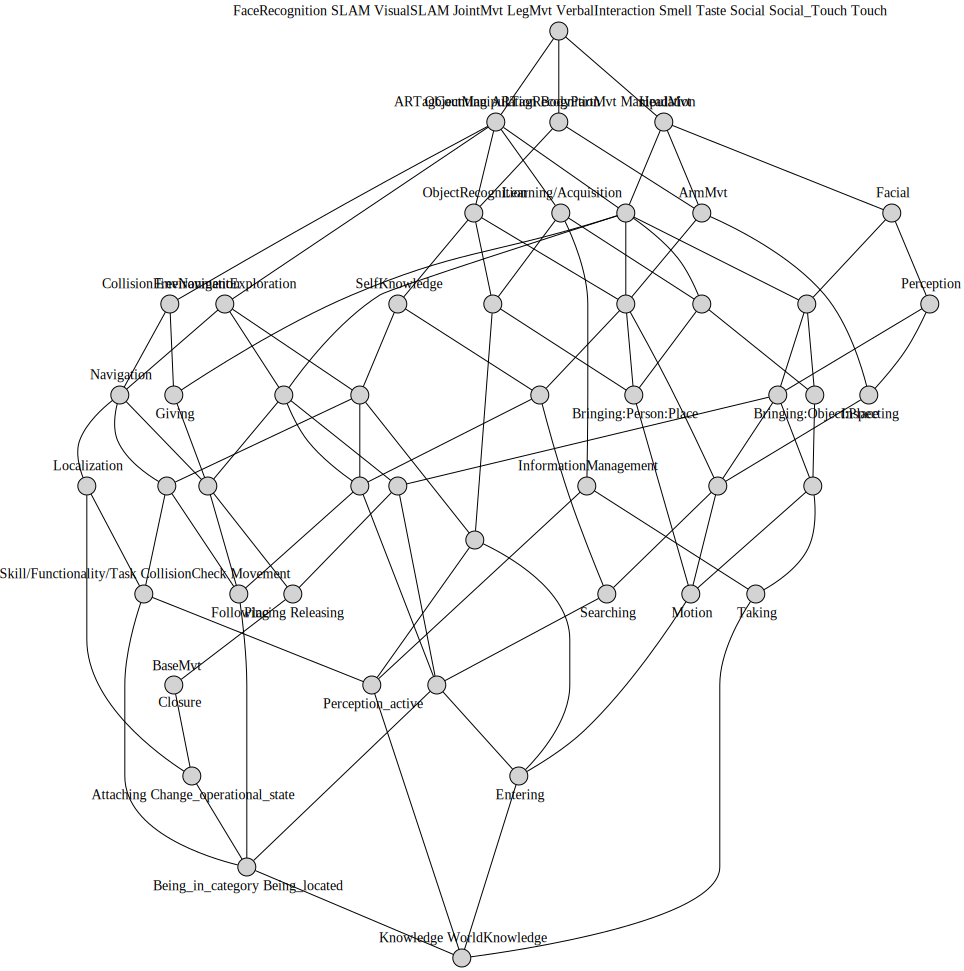

In [11]:
spec3.visualize(inverse=True)

In [12]:
recommender3 = spec3.get_frame_recommender(['Skill/Functionality/Task',
                                           'CollisionCheck',
                                           'CollisionFreeNavigation',
                                           'ARTagCounting',
                                           'ARTagRecognition',
                                           'EnvironmentExploration',
                                           'Localization',
                                           'Knowledge',
                                           'WorldKnowledge',
                                           'SelfKnowledge',
                                           'Movement',
                                           'BaseMvt',
                                           'Learning/Acquisition',
                                           'VerbalInteraction',
                                           'Navigation',
                                           'InformationManagement',
                                           'Perception',
                                           'Facial'
                                          ])
recommender3.visualize_table()

frame,fulfillable,missing_cap,recommended,possible
Attaching,False,"['ObjectManipulation', 'ObjectRecognition', 'BodyPartMvt', 'ArmMvt', 'Manipulation']","('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located')"
Being_in_category,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located')"
Being_located,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located')"
Bringing:Person:Place,True,[],"('Bringing:Person:Place',)","('Bringing:Person:Place', 'Entering', 'Motion')"
Bringing:Object:Place,False,"['ObjectManipulation', 'ObjectRecognition', 'BodyPartMvt', 'ArmMvt', 'Manipulation']","('Motion',)","('Entering', 'Motion')"
Change_operational_state,False,"['ObjectManipulation', 'ObjectRecognition', 'BodyPartMvt', 'ArmMvt', 'Manipulation']","('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located')"
Closure,False,"['ObjectManipulation', 'ObjectRecognition', 'BodyPartMvt', 'ArmMvt', 'Manipulation']","('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located')"
Entering,True,[],"('Entering',)","('Entering',)"
Following,True,[],"('Following',)","('Being_in_category', 'Being_located', 'Following')"
Giving,False,"['ObjectManipulation', 'ObjectRecognition', 'BodyPartMvt', 'ArmMvt', 'Manipulation']","('Following',)","('Being_in_category', 'Being_located', 'Following')"
